# Netflix Business Case Study - EDA Using Python

The objective of this assignment is to analyze the given Netflix dataset and generate insights.

## About the Dataset
Netflix is one of the most popular media and video streaming platforms. They have over 10,000 movies or TV shows available on their platform. As of mid-2021, they had over 222M subscribers globally.  
This tabular dataset consists of listings of all the movies and TV shows available on Netflix, along with details such as cast, directors, ratings, release year, duration, etc.

## Objectives of the Assignment
- Perform EDA on the given dataset and find insights.
- Provide useful insights and business recommendations that can help the business grow.

## Steps Required
1. **Importing Libraries**
2. **Loading the Data**
3. **Basic Observations**:
   - Shape of the dataset
   - Checking a few rows
   - Count of the non-null values
   - Unique values of each column
   - Detailed description of numerical and categorical columns
4. **Data Cleaning**:
   - Overall null values in each column
   - Impute null values using the `fillna()` method
   - Replace incorrect entries in the `rating` column
   - Change the datatype of the `date_added` column from `object` to `datetime` using Pandas' `to_datetime()` function
   - Check the types of content present in the dataset (Hint: unique values of the `type` column)

## Challenging Questions
- The oldest and the most recent movie/TV show released on Netflix: In which year?
- What are the different ratings available on Netflix for each type of content (Movies/TV Shows)? Check the number of contents released for each type.
- Total movies and TV shows directed by each director.

## Visual Analysis
- Distribution of content across the different types (Movies/TV Shows) using a Matplotlib pie chart
- General visual analysis of null values in each column
- Seaborn box plot for each numeric column to identify any outliers


------------------------------------------------------------------------------------------------------------------
1. **Import Libraries**

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


2. **Load dataset**

In [204]:
df=pd.read_csv("Netflix_dataset.csv")

3. **Basic Operations**

In [205]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [206]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- We have only date column which is counted as integer and 11 object type columns. 

In [208]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- Here, the describe function is useless because it is working on `year column`.  

In [209]:
df.shape

(8807, 12)

- We have 12 columns and 8807 rows. 

In [210]:
# Count of non-null values in each column
non_null_values = df.count()

# Display the results
print(non_null_values)


show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64


In [211]:
for i in df:
    print(f"The numbers of unique values in {i} is:",df[i].nunique())
    print("---------------------------------------------------------")

The numbers of unique values in show_id is: 8807
---------------------------------------------------------
The numbers of unique values in type is: 2
---------------------------------------------------------
The numbers of unique values in title is: 8807
---------------------------------------------------------
The numbers of unique values in director is: 4528
---------------------------------------------------------
The numbers of unique values in cast is: 7692
---------------------------------------------------------
The numbers of unique values in country is: 748
---------------------------------------------------------
The numbers of unique values in date_added is: 1767
---------------------------------------------------------
The numbers of unique values in release_year is: 74
---------------------------------------------------------
The numbers of unique values in rating is: 17
---------------------------------------------------------
The numbers of unique values in duration is: 

In [212]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in show_id: ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
Unique values in type: ['Movie' 'TV Show']
Unique values in title: ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
Unique values in director: ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
Unique values in cast: [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan New

In [213]:
## detailed description of numerical and categorical columns. 
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


4. **Data Cleaning** 

In [214]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [215]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

- This is the count and percentage of missing values in each column.

In [216]:
# Impute null values
df['director'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['date_added'].fillna('Not Available',inplace=True)
df['rating'].fillna('Unrated',inplace=True)


In [217]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [218]:
df['duration_numeric']=df['duration'].replace(r'\D','',regex=True).astype(float)

In [219]:
df['duration'] = df['duration'].replace('.*(Seasons).*', 'Unknown', regex=True)
df['duration'] = df['duration'].replace('.*(Season).*', 'Unknown', regex=True)


In [220]:
df['duration_numeric'].fillna(df['duration_numeric'].median(), inplace=True)


In [221]:
# Example after handling
print(df['duration'].unique())
# Output: ['90.0 min', '2.0 Seasons', '1.0 Season', '158.0 min', '88.0 min', 'Unknown']


['90 min' 'Unknown' '91 min' '125 min' '104 min' '127 min' '67 min'
 '94 min' '161 min' '61 min' '166 min' '147 min' '103 min' '97 min'
 '106 min' '111 min' '110 min' '105 min' '96 min' '124 min' '116 min'
 '98 min' '23 min' '115 min' '122 min' '99 min' '88 min' '100 min'
 '102 min' '93 min' '95 min' '85 min' '83 min' '113 min' '13 min'
 '182 min' '48 min' '145 min' '87 min' '92 min' '80 min' '117 min'
 '128 min' '119 min' '143 min' '114 min' '118 min' '108 min' '63 min'
 '121 min' '142 min' '154 min' '120 min' '82 min' '109 min' '101 min'
 '86 min' '229 min' '76 min' '89 min' '156 min' '112 min' '107 min'
 '129 min' '135 min' '136 min' '165 min' '150 min' '133 min' '70 min'
 '84 min' '140 min' '78 min' '64 min' '59 min' '139 min' '69 min'
 '148 min' '189 min' '141 min' '130 min' '138 min' '81 min' '132 min'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 min' '38 min' '126 min' '155 min' '159 min' '137 min' '12 min'
 '273 min' '36 min' '34 min' '77 min'

In [222]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unrated', 'TV-Y7-FV', 'UR'], dtype=object)

In [223]:
df['rating'] = df['rating'].replace(['NR', 'UR','74 min','84 min', '66 min', '158 min'], 'Unrated')


In [224]:
# Convert the 'date_added' column from object to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [225]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,Unknown,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,Unknown,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,Unknown,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,Unknown,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0


In [226]:
# Display the unique values in the 'type' column to check content types
df['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [227]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

### Visual Analysis

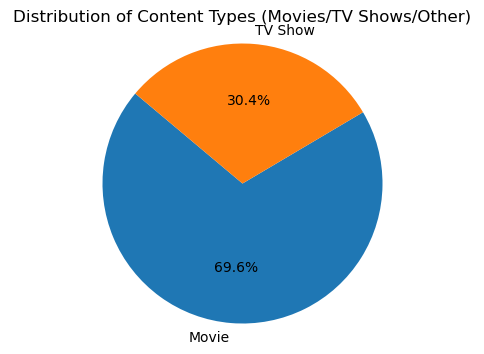

In [228]:
content_counts = df['type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types (Movies/TV Shows/Other)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [229]:
df.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added          98
release_year         0
rating               0
duration             3
listed_in            0
description          0
duration_numeric     0
dtype: int64

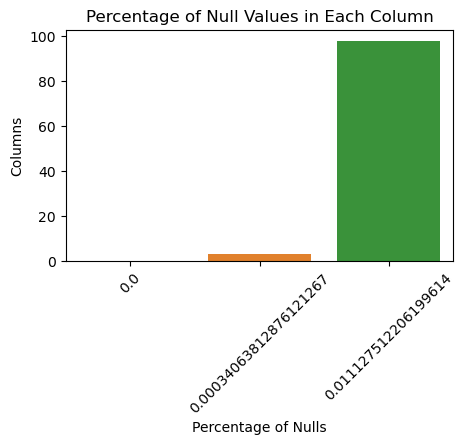

In [239]:

# Plotting the distribution of null values across columns
plt.figure(figsize=(5, 3))
sns.barplot(x=df.isnull().mean().sort_values(), y=df.isnull().sum().sort_values())
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Percentage of Nulls')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='duration_numeric'>

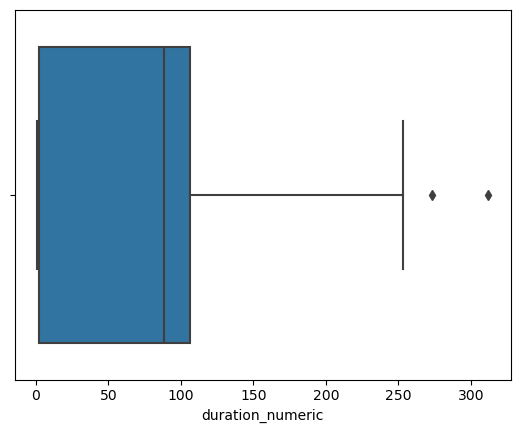

In [234]:
sns.boxplot(x=df['duration_numeric'])

<Axes: xlabel='release_year'>

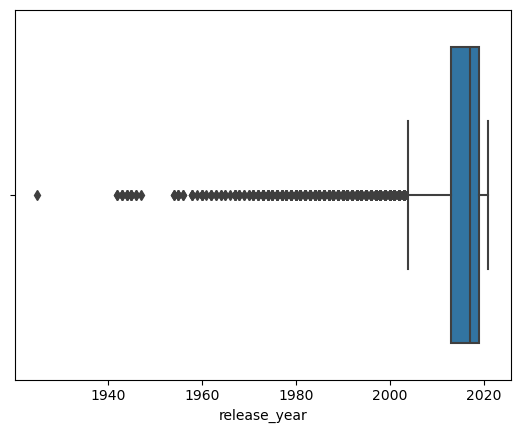

In [235]:
sns.boxplot(x=df['release_year'])

In [254]:
# Oldest release year
oldest_year = df['release_year'].min()

# Most recent release year
most_recent_year = df['release_year'].max()

print(f"The oldest content is from {oldest_year} and the most recent content is from {most_recent_year}.")


The oldest content is from 1925 and the most recent content is from 2021.


In [267]:
df.groupby(['director'])['title'].count().sort_values()

director
Khaled Youssef               1
Lucy Cohen                   1
Lucy van Beek                1
Ludovic Bernard              1
Ludovico Di Martino          1
                          ... 
Suhas Kadav                 16
Marcus Raboy                16
Raúl Campos, Jan Suter      18
Rajiv Chilaka               19
Unknown                   2634
Name: title, Length: 4529, dtype: int64

In [ ]:
# Check the number of contents released in each type.
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [275]:
#Which are the different ratings available on Netflix in each type of content (Movies/TV Show)? 
df.groupby(['type','rating'])['title'].count()

type     rating  
Movie    G             41
         NC-17          3
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2062
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         Unrated       83
TV Show  R              2
         TV-14        733
         TV-G          94
         TV-MA       1145
         TV-PG        323
         TV-Y         176
         TV-Y7        195
         TV-Y7-FV       1
         Unrated        7
Name: title, dtype: int64